In [1]:
import requests
import pandas as pd
import nltk
from bs4 import BeautifulSoup as bs
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

main_url = 'https://www.ccu.edu/sitemap_main.xml'

browser.visit(main_url)

[WDM] - Current google-chrome version is 86.0.4240
[WDM] - Get LATEST driver version for 86.0.4240
[WDM] - Driver [C:\Users\coled\.wdm\drivers\chromedriver\win32\86.0.4240.22\chromedriver.exe] found in cache


In [3]:
html = browser.html

In [4]:
sitemap_soup = bs(html, 'lxml')

In [5]:
sitemap_urls = sitemap_soup.select('loc')

In [6]:
list_urls = []

for u in sitemap_urls:
    list_urls.append(u.text)

In [7]:
list_urls

['https://www.ccu.edu/campaign/',
 'https://www.ccu.edu/campaign/anschutzstudentcenter/',
 'https://www.ccu.edu/campaign/camera/',
 'https://www.ccu.edu/campaign/future/',
 'https://www.ccu.edu/campaign/giving/',
 'https://www.ccu.edu/campaign/leprinohall/',
 'https://www.ccu.edu/campaign/milestones/',
 'https://www.ccu.edu/campaign/overview/',
 'https://www.ccu.edu/campaign/yetterhall/',
 'https://www.ccu.edu/campaign/rockmont-hall/',
 'https://www.ccu.edu/events/',
 'https://www.ccu.edu/events/vals/',
 'https://www.ccu.edu/events/vals/business-programs/',
 'https://www.ccu.edu/events/vals/videos/',
 'https://www.ccu.edu/events/vals/sponsorships/',
 'https://www.ccu.edu/events/vals/sponsors/',
 'https://www.ccu.edu/events/vals/sbl-anniversary-dinner/',
 'https://www.ccu.edu/events/commencement/',
 'https://www.ccu.edu/events/commencement/things-to-remember/',
 'https://www.ccu.edu/events/commencement/hotels/',
 'https://www.ccu.edu/events/commencement/gifts-for-graduates/',
 'https://

In [8]:
browser.visit(list_urls[0])

'<html xmlns="http://www.w3.org/1999/xhtml" lang="en" class=" uk-notouch" style="overflow-y: scroll;"><head><meta charset="UTF-8"><meta content="IE=edge" http-equiv="X-UA-Compatible"><meta content="width=device-width,initial-scale=1" name="viewport"><link href="https://www.ccu.edu/campaign" rel="canonical"><meta content="411534690a14003827e5032be3c10047" name="id"><script async="" src="//www.gstatic.com/call-tracking/call-tracking_2.js" nonce="null"></script><script async="" src="//www.gstatic.com/call-tracking/call-tracking_2.js" nonce="null"></script><script type="text/javascript" async="" src="https://www.google-analytics.com/gtm/js?id=OPT-T6S9D28&amp;t=gtm5&amp;cid=740508122.1607393519"></script><script src="https://connect.facebook.net/signals/config/1006206839772301?v=2.9.29&amp;r=stable" async=""></script><script async="" src="https://connect.facebook.net/en_US/fbevents.js"></script><script async="" src="//www.gstatic.com/wcm/loader.js"></script><script async="" src="//www.gstat
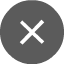
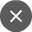

In [9]:
browser.html

In [10]:
page_html = browser.html

In [11]:
page_soup = bs(page_html, 'html.parser')

<html class="uk-notouch" lang="en" style="overflow-y: scroll;" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width,initial-scale=1" name="viewport"/>
  <link href="https://www.ccu.edu/campaign" rel="canonical"/>
  <meta content="411534690a14003827e5032be3c10047" name="id"/>
  <script async="" nonce="null" src="//www.gstatic.com/call-tracking/call-tracking_2.js">
  </script>
  <script async="" nonce="null" src="//www.gstatic.com/call-tracking/call-tracking_2.js">
  </script>
  <script async="" src="https://www.google-analytics.com/gtm/js?id=OPT-T6S9D28&amp;t=gtm5&amp;cid=740508122.1607393519" type="text/javascript">
  </script>
  <script async="" src="https://connect.facebook.net/signals/config/1006206839772301?v=2.9.29&amp;r=stable">
  </script>
  <script async="" src="https://connect.facebook.net/en_US/fbevents.js">
  </script>
  <script async="" src="//www.gstatic.com/wcm/
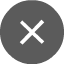
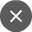

In [12]:
print(page_soup.prettify())

In [13]:
page_title = page_soup.find('title').text
page_title

'Capital Campaign | Colorado Christian University'

In [14]:
page_h1 = page_soup.find('h1').text
page_h1

'Capital Campaign'

In [25]:
page_paras = page_soup.select('p')
page_paras

page_text = []

for p in page_paras:
    page_text.append(p.text)
    
page_text

['Rockmont Hall, a 115,000-square-foot apartment-style facility, is the second new residence hall constructed as part of the campus redevelopment campaign. It opened in August 2019.',
 'The Anschutz Student Center opened in 2017. The student center stands at the center of CCU’s campus, and offers 60,000 square feet of dining, hangout, and office space.',
 'The Great Room in the new Anschutz Student Center is a beautiful space that is available for many different gatherings of students and visitors on campus, from socializing and group study to special events and banquets.',
 'In August 2015, Yetter Hall opened to students. The 103,000-square-foot residence hall, which features 53 apartment-style units, is home to more than 300 students. Learn more about Yetter Hall.',
 "The first phase of CCU's Campus Redevelopment project concluded with the completion of Leprino Hall in September 2014, the University's first new academic building. This phase also included infrastructure improvements a

In [26]:
from cleantext import clean

In [31]:
clean_paras = clean(page_text, no_punct=True)

In [32]:
clean_paras

'rockmont hall a 115000squarefoot apartmentstyle facility is the second new residence hall constructed as part of the campus redevelopment campaign it opened in august 2019 the anschutz student center opened in 2017 the student center stands at the center of ccus campus and offers 60000 square feet of dining hangout and office space the great room in the new anschutz student center is a beautiful space that is available for many different gatherings of students and visitors on campus from socializing and group study to special events and banquets in august 2015 yetter hall opened to students the 103000squarefoot residence hall which features 53 apartmentstyle units is home to more than 300 students learn more about yetter hall the first phase of ccus campus redevelopment project concluded with the completion of leprino hall in september 2014 the universitys first new academic building this phase also included infrastructure improvements and real estate acquisitions ccus is in the midst

In [33]:
tokens = [t for t in clean_paras.split()]

In [34]:
tokens

['rockmont',
 'hall',
 'a',
 '115000squarefoot',
 'apartmentstyle',
 'facility',
 'is',
 'the',
 'second',
 'new',
 'residence',
 'hall',
 'constructed',
 'as',
 'part',
 'of',
 'the',
 'campus',
 'redevelopment',
 'campaign',
 'it',
 'opened',
 'in',
 'august',
 '2019',
 'the',
 'anschutz',
 'student',
 'center',
 'opened',
 'in',
 '2017',
 'the',
 'student',
 'center',
 'stands',
 'at',
 'the',
 'center',
 'of',
 'ccus',
 'campus',
 'and',
 'offers',
 '60000',
 'square',
 'feet',
 'of',
 'dining',
 'hangout',
 'and',
 'office',
 'space',
 'the',
 'great',
 'room',
 'in',
 'the',
 'new',
 'anschutz',
 'student',
 'center',
 'is',
 'a',
 'beautiful',
 'space',
 'that',
 'is',
 'available',
 'for',
 'many',
 'different',
 'gatherings',
 'of',
 'students',
 'and',
 'visitors',
 'on',
 'campus',
 'from',
 'socializing',
 'and',
 'group',
 'study',
 'to',
 'special',
 'events',
 'and',
 'banquets',
 'in',
 'august',
 '2015',
 'yetter',
 'hall',
 'opened',
 'to',
 'students',
 'the',
 '1030

In [35]:
from nltk.corpus import stopwords

In [40]:
sr= stopwords.words('english')

In [41]:
clean_tokens = tokens[:]

In [42]:
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)

In [43]:
clean_tokens

['rockmont',
 'hall',
 '115000squarefoot',
 'apartmentstyle',
 'facility',
 'second',
 'new',
 'residence',
 'hall',
 'constructed',
 'part',
 'campus',
 'redevelopment',
 'campaign',
 'opened',
 'august',
 '2019',
 'anschutz',
 'student',
 'center',
 'opened',
 '2017',
 'student',
 'center',
 'stands',
 'center',
 'ccus',
 'campus',
 'offers',
 '60000',
 'square',
 'feet',
 'dining',
 'hangout',
 'office',
 'space',
 'great',
 'room',
 'new',
 'anschutz',
 'student',
 'center',
 'beautiful',
 'space',
 'available',
 'many',
 'different',
 'gatherings',
 'students',
 'visitors',
 'campus',
 'socializing',
 'group',
 'study',
 'special',
 'events',
 'banquets',
 'august',
 '2015',
 'yetter',
 'hall',
 'opened',
 'students',
 '103000squarefoot',
 'residence',
 'hall',
 'features',
 '53',
 'apartmentstyle',
 'units',
 'home',
 '300',
 'students',
 'learn',
 'yetter',
 'hall',
 'first',
 'phase',
 'ccus',
 'campus',
 'redevelopment',
 'project',
 'concluded',
 'completion',
 'leprino',
 'h

In [44]:
len(tokens)

718

In [45]:
len(clean_tokens)

435

In [46]:
freq = nltk.FreqDist(clean_tokens)

In [55]:
freq.most_common(10)

[('campus', 13),
 ('students', 12),
 ('hall', 9),
 ('center', 7),
 ('university', 7),
 ('student', 6),
 ('great', 6),
 ('opened', 5),
 ('space', 5),
 ('first', 5)]

In [56]:
freq_words = []
for key,val in freq.most_common(10):
    words_dict = {}
    words_dict["word"] = key
    words_dict["count"] = val
    freq_words.append(words_dict)

In [57]:
freq_words

[{'word': 'campus', 'count': 13},
 {'word': 'students', 'count': 12},
 {'word': 'hall', 'count': 9},
 {'word': 'center', 'count': 7},
 {'word': 'university', 'count': 7},
 {'word': 'student', 'count': 6},
 {'word': 'great', 'count': 6},
 {'word': 'opened', 'count': 5},
 {'word': 'space', 'count': 5},
 {'word': 'first', 'count': 5}]

In [37]:
clean_tokens = tokens[:]

In [38]:
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)

In [39]:
clean_tokens

['rockmont',
 'hall',
 '115000squarefoot',
 'apartmentstyle',
 'facility',
 'second',
 'new',
 'residence',
 'hall',
 'constructed',
 'part',
 'campus',
 'redevelopment',
 'campaign',
 'opened',
 'august',
 '2019',
 'anschutz',
 'student',
 'center',
 'opened',
 '2017',
 'student',
 'center',
 'stands',
 'center',
 'ccus',
 'campus',
 'offers',
 '60000',
 'square',
 'feet',
 'dining',
 'hangout',
 'office',
 'space',
 'great',
 'room',
 'new',
 'anschutz',
 'student',
 'center',
 'beautiful',
 'space',
 'available',
 'many',
 'different',
 'gatherings',
 'students',
 'visitors',
 'campus',
 'socializing',
 'group',
 'study',
 'special',
 'events',
 'banquets',
 'august',
 '2015',
 'yetter',
 'hall',
 'opened',
 'students',
 '103000squarefoot',
 'residence',
 'hall',
 'features',
 '53',
 'apartmentstyle',
 'units',
 'home',
 '300',
 'students',
 'learn',
 'yetter',
 'hall',
 'first',
 'phase',
 'ccus',
 'campus',
 'redevelopment',
 'project',
 'concluded',
 'completion',
 'leprino',
 'h

In [22]:
for p in page_text:
    clean(page_text, no_punct=True)
    print(p)

Rockmont Hall, a 115,000-square-foot apartment-style facility, is the second new residence hall constructed as part of the campus redevelopment campaign. It opened in August 2019.
The Anschutz Student Center opened in 2017. The student center stands at the center of CCU’s campus, and offers 60,000 square feet of dining, hangout, and office space.
The Great Room in the new Anschutz Student Center is a beautiful space that is available for many different gatherings of students and visitors on campus, from socializing and group study to special events and banquets.
In August 2015, Yetter Hall opened to students. The 103,000-square-foot residence hall, which features 53 apartment-style units, is home to more than 300 students. Learn more about Yetter Hall.
The first phase of CCU's Campus Redevelopment project concluded with the completion of Leprino Hall in September 2014, the University's first new academic building. This phase also included infrastructure improvements and real estate acq

In [ ]:
page_info = {}

In [ ]:
page_info["page_title"] = page_title
page_info["page_h1"] = page_h1
page_info["page_text"] = page_text

In [ ]:
page_info

In [ ]:
from cleantext import clean

In [ ]:
p_text = clean(p.text, no_punct=True)

In [ ]:
p_text

In [ ]:
tokens = [t for t in p_text.split()]

In [ ]:
token_text = []

tokens

In [ ]:
clean_page_text = []

for p in page_text:
    p_text = clean(p.text, no_punct=True)
    tokens = [t for t in p_text.split()]
    clean_page_text.append(tokens)

In [58]:
browser.quit()